# Pictures Classification

In [1]:
import torch
import random
import numpy as np

# init (so our exps can be replayed)
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# Dataset for pics (MNIST)

In [2]:
import torchvision.datasets
# download train and test pictures from dataset
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [4]:
# what is the type? X_train - pictures, y_train - labels
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [5]:
# let's make everything in float type
X_train = X_train.float()
X_test = X_test.float()
# and what on the size of datasets: 28x28 - pictures size
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([60000]) torch.Size([10000])


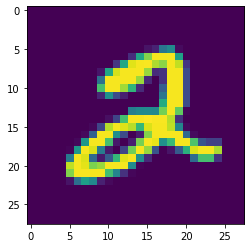

tensor(2)


In [6]:
# let's see how out pictures look like
import matplotlib.pyplot as plt
plt.imshow(X_train[5, :, :])
plt.show()
print(y_train[5])

In [7]:
# растянем картинки в один вектор (так как каждая картинка описывает двумерным тензором, надо исправить)
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [29]:
# create a model
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    # пропускает х через все слои
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [15]:
# let's try to make with GPU
torch.cuda.is_available()

True

In [16]:
# check if it's busy with some other processes
!nvidia-smi

Fri Oct 14 21:21:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W /  70W |    878MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
# we are goinf to put Inputs (pictures) and parametres of nn on the GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# torch.nn.Module allows us to make .to (and put it on the gpu)
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[ 0.0088,  0.0058,  0.0317,  ..., -0.0279,  0.0182, -0.0278],
         [-0.0018, -0.0255, -0.0028,  ..., -0.0291, -0.0228, -0.0238],
         [-0.0309,  0.0338,  0.0235,  ...,  0.0287, -0.0031, -0.0043],
         ...,
         [ 0.0261, -0.0178,  0.0327,  ...,  0.0246, -0.0019,  0.0242],
         [ 0.0238, -0.0312,  0.0318,  ...,  0.0113,  0.0340,  0.0125],
         [ 0.0345,  0.0153,  0.0306,  ...,  0.0093, -0.0028, -0.0283]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-0.0245, -0.0200, -0.0131, -0.0120,  0.0316, -0.0002,  0.0278, -0.0225,
          0.0250,  0.0270,  0.0091, -0.0042, -0.0290, -0.0142,  0.0132, -0.0160,
          0.0022,  0.0347, -0.0131,  0.0153,  0.0032, -0.0138,  0.0204,  0.0323,
          0.0164,  0.0228,  0.0221,  0.0245,  0.0244,  0.0209, -0.0356, -0.0345,
          0.0188,  0.0259,  0.0061,  0.0225,  0.0271,  0.0099,  0.0029, -0.0022,
          0.0082, -0.0173,  0.0084, -0.0354,  0.0118,  0.0007, 

In [31]:
# we also need loss function and optimizer for gradient diecent
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [19]:
# Answer on the task
x = torch.ones([6000, 28, 28], dtype=torch.int32)
print(x.shape)
#print(x.reshape(-1, 9).shape)
print(x.reshape(-1,6000).shape)
print(x.reshape(len(x[1]), len(x), len(x[2])).shape)
print(x.reshape(-1).shape)
print(x.reshape(-1,1,1).shape)
print(x.reshape(-1,14,32,7).shape)

torch.Size([6000, 28, 28])
torch.Size([784, 6000])
torch.Size([28, 6000, 28])
torch.Size([4704000])
torch.Size([4704000, 1, 1])
torch.Size([1500, 14, 32, 7])


# Process of learning

In [ ]:
# батчевый (стахостический) град спуск
batch_size = 100

# to make a graph we will save accuracy on every epoch
test_accuracy_history = []
test_loss_history = []

# put on the device
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    # mix dataset
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        # also put every concern batch on the device
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        # count gradients
        loss_value.backward()
        
        optimizer.step()

    # we will also make a prediction on test dataset
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    # argmax give the number of neuron with max amount
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().cpu().detach().numpy()
    test_accuracy_history.append(accuracy)
    print(accuracy)

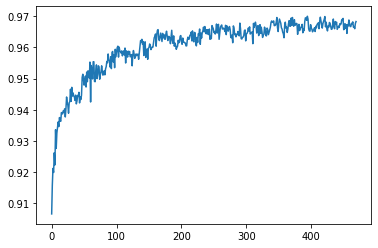

In [33]:
plt.plot(test_accuracy_history)

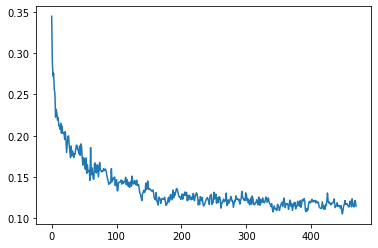

In [34]:
plt.plot(test_loss_history);